In [1]:
# !pip install missingno
# !pip install xgboost

<h2>   
      <font color = Red >
            <span style='font-family:Georgia'>
            Table of Contents:
            </span>   
        </font>    
</h2>
<span style='font-family:Georgia'>
    <ol>
        <li><a href='#intro'>Title & Background</a></li>
        <li><a href='#libraries'>Import Required Libraries</a></li>
        <li><a href='#import'>Reading & Understanding the data</a></li>
        <ol>
            <li><a href='#input'>Importing the input files</a></li>
            <li><a href='#inspect'>Inspect Data Frames</a></li>
        </ol>
        <li><a href='#clean'>Data Cleaning & Manipulation</a></li>
        <ol>
            <li><a href='#null'>Missing Value Identification</a></li>
            <li><a href='#impute'>Null Value Data Imputation</a></li>
            <li><a href='#outlier'>Identifying the outliers</a></li>
            <li><a href='#clean1'>Outliers Treatment</a></li>
            <li><a href='#stdval'>Standardize Values</a></li>
        </ol>
        <li><a href='#analysis'>Data Analysis</a></li>
        <ol>
            <li><a href='#imbalance'>Imbalance Analysis</a></li>
            <li><a href='#pltfunc'>Plotting Functions</a></li>
            <li><a href='#catvar'>Categorical Variables Analysis</a></li>
            <li><a href='#numvar'>Numeric Variables Analysis</a></li>
        </ol>
        <li><a href='#merge'>Merged Dataframes Analysis</a></li>
        <li><a href='#conclusion'>Conclusions</a></li>
    </ol>
</span>
    

<h3 >   
      <font color = Red >
            <span style='font-family:Georgia'>
            Title:
            </span>   
        </font>    
</h3>
<p>
    <span style='font-family:Georgia'>
    Loan Default Prediction and Evaluation Criteria 
    </span>
</p>   
<hr>
<h3>
    <font color = Red >
        <span style='font-family:Georgia'>
            Background:
            </span>   
        </font>    
</h3>
<p>
    <span style='font-family:Georgia'>
    For financial ins tu ons, the ability to predict loan defaults is a cri cal factor 
in managing financial risk, maintaining profitability, and ensuring sustainable growth. 
Defaulted loans can significantly disrupt the financial health of an ins tu on, as they lead to 
substan al losses and may poten ally affect the ins tu on's credibility. Tradi onal risk 
assessment methods, which largely rely on a borrower's credit score, income, and collateral, 
have not been en rely efficient in predic ng loan defaults. This inefficiency could be 
a ributed to their inability to capture complex pa erns and rela onships in the data, 
thereby necessita ng a more advanced approach. 
    </span>
</p>



<h3 name='libraries'>   
      <font color = Red >
            <span style='font-family:Georgia'>
            2 Import Python Libraries:
            </span>   
        </font>    
</h3>

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as mn

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats

from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree


import xgboost as xgb
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

<h3 name='libraries'>   
      <font color = Red >
            <span style='font-family:Georgia'>
            3 Reading and Understanding the Data:
            </span>   
        </font>    
</h3>

In [3]:
df = pd.read_csv('./Dataset.csv')
pd.set_option('display.max_columns', None)
print(df.shape) 
df.head()

(121856, 40)


,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL,Home,0.028663,13957,1062,6123,383,NaN,1,1,0,Sales,2.0,2.0,6.0,17.0,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,Service,Graduation,M,Male,CL,Home,0.008575,14162,4129,7833,21,0.0,1,0,1,NaN,2.0,2.0,3.0,10.0,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,Service,Graduation dropout,W,Male,CL,Family,0.0228,16790,5102,NaN,331,NaN,1,0,0,Realty agents,2.0,2.0,4.0,NaN,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,Retired,Secondary,M,Male,CL,Home,0.010556,23195,365243,NaN,775,NaN,1,0,0,NaN,2.0,3.0,2.0,15.0,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,Commercial,Secondary,M,Female,CL,Home,0.020713,11366,2977,5516,4043,6.0,1,0,0,Laborers,4.0,1.0,3.0,NaN,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [4]:
# Checking Features Data Types
print(df.dtypes.value_counts())
df.info()

object     20
float64    15
int64       5
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Clie

In [5]:
# Variables are mis-tagged - Client_Income, Credit_Amount, Loan_Annuity, Population_Region_Relative, Age_Days, Employed_Days, Registration_Days,
# Score_Source_3 has to be Numeric
# Checking unique values in Variables 
# Population_Region_Relative is having invlid values like @ and #
# df['Age_Days'].value_counts() 

In [6]:
## Remove Invalid Values in the feature
df['Client_Income'] = df['Client_Income'].replace(['$'],np.nan).astype('float')
df['Credit_Amount'] = df['Credit_Amount'].replace(['$'],np.nan).astype('float')
df['Loan_Annuity'] = df['Loan_Annuity'].replace(['$','#VALUE!'],np.nan).astype('float')
df['Population_Region_Relative'] = df['Population_Region_Relative'].replace(['@','#'],np.nan).astype('float')
df['Age_Days'] = df['Age_Days'].replace(['X','x'],np.nan).astype(float)
df['Employed_Days'] = df['Employed_Days'].replace(['x'],np.nan).astype(float)
df['Registration_Days'] = df['Registration_Days'].replace(['x'],np.nan).astype(float)
df['ID_Days'] = df['ID_Days'].replace(['x'],np.nan).astype(float)
df['Score_Source_3'] = df['Score_Source_3'].replace(['&'],np.nan).astype(float)

# Change numerical column datatypes from object to int and remove invalidstring data
df['Client_Income'] = pd.to_numeric(df['Client_Income'], errors='coerce')
df['Credit_Amount'] = pd.to_numeric(df['Credit_Amount'], errors='coerce')
df['Loan_Annuity'] = pd.to_numeric(df['Loan_Annuity'], errors='coerce')
df['Age_Days'] = pd.to_numeric(df['Age_Days'], errors='coerce')
df['Employed_Days'] = pd.to_numeric(df['Employed_Days'], errors='coerce')
df['Registration_Days'] = pd.to_numeric(df['Registration_Days'], errors='coerce')
df['Score_Source_3'] = pd.to_numeric(df['Score_Source_3'], errors='coerce')
df['ID_Days'] = pd.to_numeric(df['ID_Days'], errors='coerce')

# Clean and convert 'Population_Region_Relative' column to numeric
# df['Population_Region_Relative'] = df['Population_Region_Relative'].str.replace('[^0-9.]', '', regex=True)
df['Population_Region_Relative'] = pd.to_numeric(df['Population_Region_Relative'], errors='coerce')

# df.info()
# Checking Features Data Types
print(df.dtypes.value_counts())
df.describe()

float64    24
object     11
int64       5
Name: count, dtype: int64


,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
count,1.218560e+05,1.182340e+05,118275.000000,118232.000000,118221.000000,118195.000000,118218.000000,118219.000000,117030.000000,116988.000000,118239.000000,118190.000000,118225.000000,115871.000000,41761.000000,121856.000000,121856.000000,121856.000000,119446.000000,119447.000000,119428.000000,118193.000000,53021.000000,116170.000000,94934.000000,59928.000000,118192.000000,103316.000000,121856.000000
mean,1.216093e+07,1.686519e+04,0.342854,0.332262,0.499175,0.692060,0.417779,60046.488951,2721.254492,0.022602,16027.422948,67154.070615,4975.162123,2987.471015,12.157324,0.999992,0.200499,0.281201,2.154329,2.030038,3.159736,12.063100,0.501213,0.518625,0.511180,0.117428,962.106056,1.891082,0.080792
std,3.517694e+04,1.153815e+04,0.474665,0.471026,0.500001,0.461644,0.728802,40350.663346,1461.466162,0.413617,4366.356504,138971.782951,3514.546963,1511.884576,12.056079,0.002865,0.400375,0.449587,0.912686,0.504407,1.759045,3.280695,0.211204,0.740248,0.194333,0.107974,827.976726,1.861921,0.272517
min,1.210000e+07,2.565000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,4500.000000,217.350000,0.000533,7676.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.014568,0.000005,0.000527,0.000000,0.000000,0.000000,0.000000
25%,1.213046e+07,1.125000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,27000.000000,1657.350000,0.010006,12398.000000,932.000000,2008.000000,1705.000000,5.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.333481,0.390164,0.372334,0.057700,272.000000,0.000000,0.000000
50%,1.216093e+07,1.440000e+04,0.000000,0.000000,0.000000,1.000000,0.000000,51750.000000,2499.750000,0.018850,15734.000000,2212.000000,4493.000000,3242.000000,9.000000,1.000000,0.000000,0.000000,2.000000,2.000000,3.000000,12.000000,0.504657,0.564978,0.537070,0.088700,755.000000,1.000000,0.000000
75%,1.219139e+07,2.025000e+04,1.000000,1.000000,1.000000,1.000000,1.000000,80865.000000,3466.800000,0.028663,19661.000000,5634.000000,7464.000000,4295.000000,15.000000,1.000000,0.000000,1.000000,3.000000,2.000000,5.000000,14.000000,0.673890,0.664011,0.667458,0.148500,1570.000000,3.000000,0.000000
max,1.222186e+07,1.800009e+06,1.000000,1.000000,1.000000,1.000000,19.000000,405000.000000,22500.000000,100.000000,25201.000000,365243.000000,23738.000000,7197.000000,69.000000,1.000000,1.000000,1.000000,16.000000,3.000000,6.000000,23.000000,0.945741,100.000000,0.896010,1.000000,4185.000000,22.000000,1.000000


<h3 name='libraries'>   
      <font color = Red >
            <span style='font-family:Georgia'>
            4 Data Cleaning, Preprocessing and Feature Engineering
            </span>   
        </font>    
</h3>

<h4 name='libraries'>   
      <font color = Red >
            <span style='font-family:Georgia'>
            4.1 Data Cleaning - Missing Value 
            </span>   
        </font>    
</h4>

<Axes: >

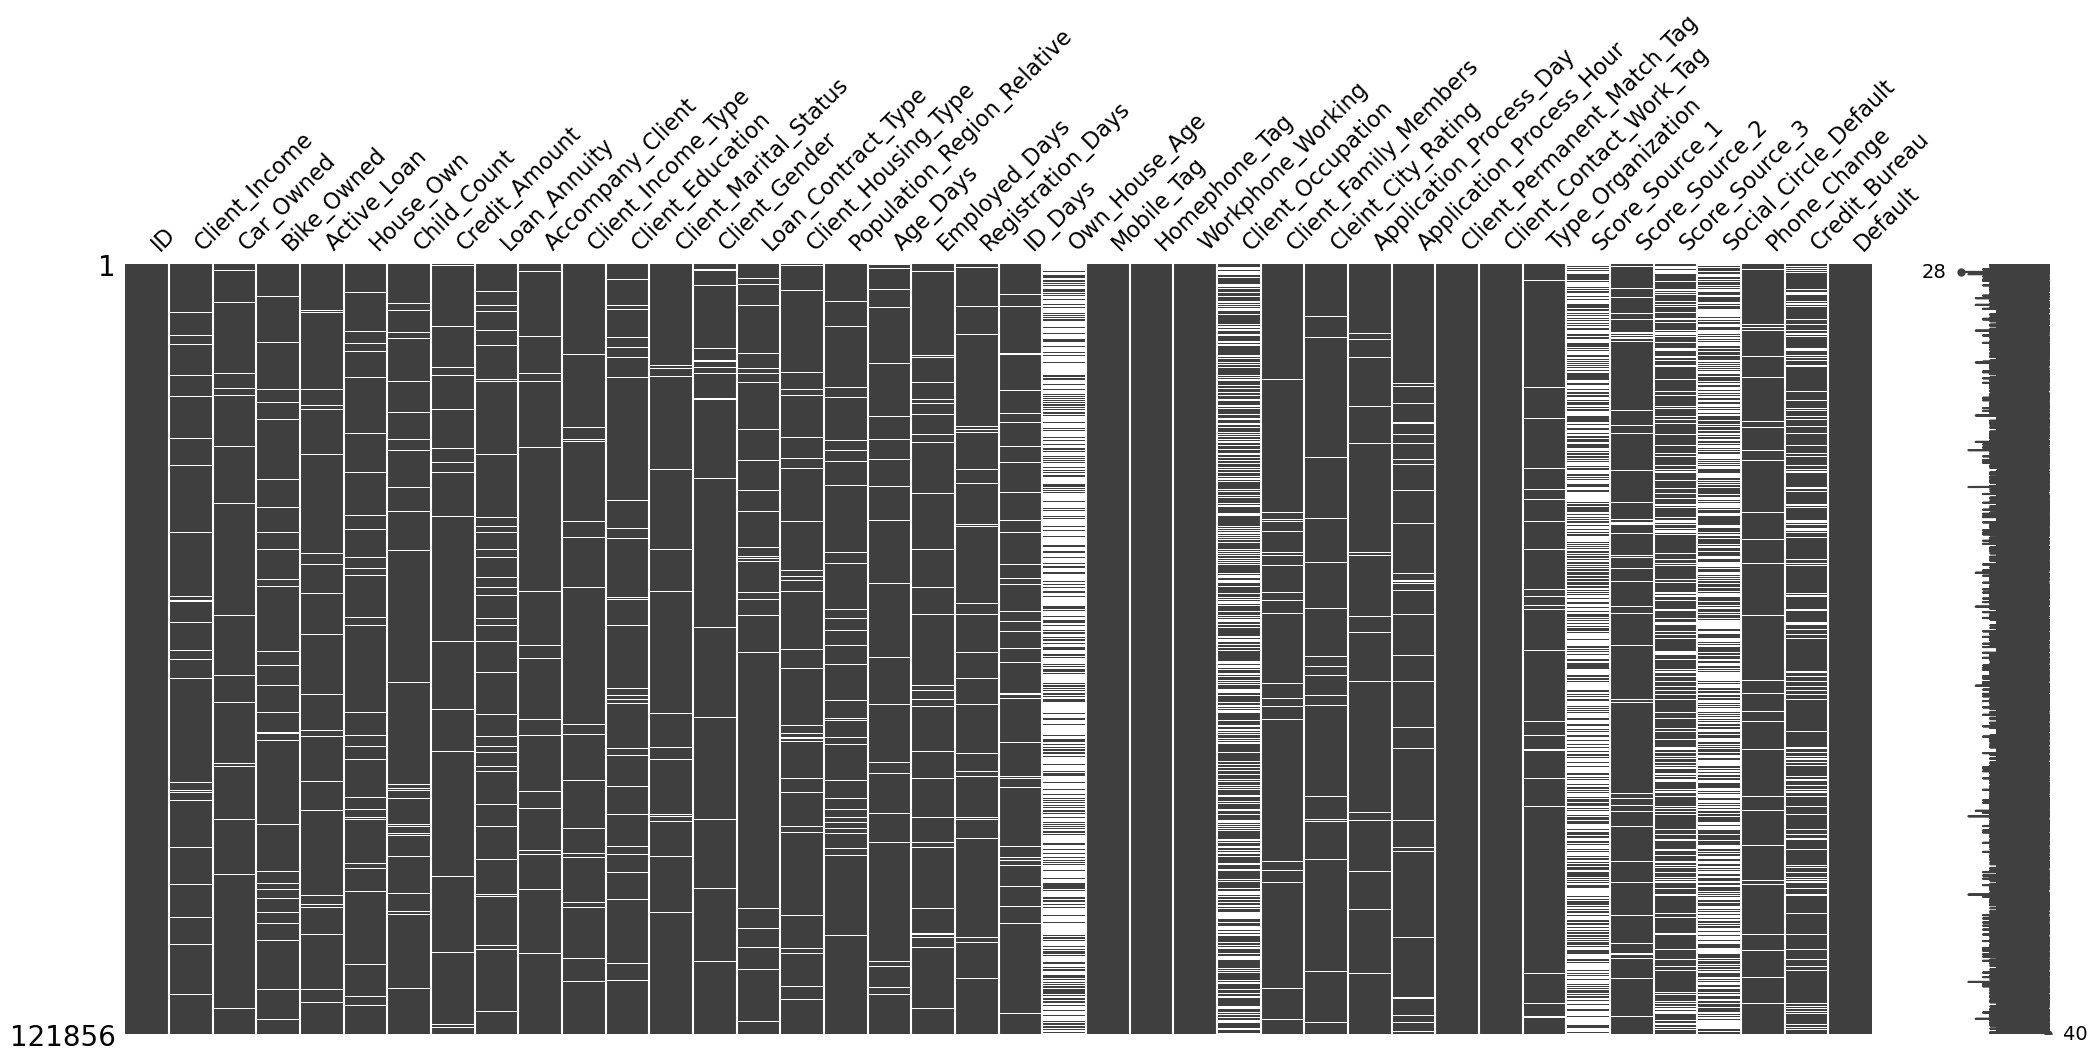

In [7]:
mn.matrix(df) 
# Lot of Missing Values especially Columns like Own_House_Age, Score_Source_1, Social_Circle_Default. etc

In [8]:
# Checkout the Missing Values Percentage across Features
null_values = df.isnull().sum().sort_values(ascending=False)
total_size = df.shape[0]
missing = (df.isnull().sum()/total_size).sort_values(ascending=False)

missing_df= pd.concat([null_values, missing], axis=1, 
                        keys=['Total missing', 'Percent missing'])

missing_df.reset_index(inplace=True)
missing_df= missing_df.rename(columns= { "index": " column name"})
 
print ("Null Values in each column:\n", 
       missing_df.sort_values(by ='Total missing', ascending = False))

Null Values in each column:
                    column name  Total missing  Percent missing
0                Own_House_Age          80095         0.657292
1               Score_Source_1          68835         0.564888
2        Social_Circle_Default          61928         0.508206
3            Client_Occupation          41435         0.340032
4               Score_Source_3          26922         0.220933
5                Credit_Bureau          18540         0.152147
6                      ID_Days           5985         0.049115
7               Score_Source_2           5686         0.046662
8   Population_Region_Relative           4868         0.039949
9                 Loan_Annuity           4826         0.039604
10          Client_Income_Type           3701         0.030372
11         Client_Housing_Type           3687         0.030257
12               Employed_Days           3666         0.030085
13                Phone_Change           3664         0.030068
14    Application_Process_

In [9]:
# Calculate the percentage of null values in each row
null_percentage = df.isnull().sum(axis=1)
null_percentage.value_counts()


## Remove Columns with >50% Null Values
cols_to_remove = missing_df.loc[missing_df["Percent missing"] > 0.5, " column name"].unique().tolist()
df = df.drop(cols_to_remove, axis=1)
df.shape


(121856, 37)

In [10]:
# Numeric Columns
numeric = df.select_dtypes(include=['int64', 'float64']).columns
numeric = [i for i in numeric if i not in ['ID', 'Default']]
categorical = df.select_dtypes(include=['object']).columns
print(len(numeric), len(categorical))
categorical

24 11


Index(['Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Client_Occupation',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization'],
      dtype='object')


### Feature Engineering

In [11]:
############# Client Occupation
# Define a function to map the categories
def map_occupation(occupation):
    if pd.isna(occupation):
        return 'Unknown'
    if occupation in ['Managers', 'HR', 'Core', 'Secretaries']:
        return 'Management'
    if occupation in ['High skill tech', 'Medicine', 'IT', 'Accountants']:
        return 'Skilled Labor'
    if occupation in ['Laborers', 'Low-skill Laborers', 'Drivers']:
        return 'Unskilled Labor'
    if occupation in ['Cleaning', 'Waiters/barmen', 'Cooking', 'Private service', 'Security', 'Medicine']:
        return 'Service Industry'
    if occupation in ['Sales', 'Realty agents']:
        return 'Sales and Realty'
    return 'Other'

# Apply the mapping function to the 'Occupation' column
df['Client_Occupation'] = df['Client_Occupation'].apply(map_occupation)
df['Client_Occupation'].value_counts()


Client_Occupation
Unknown             41435
Unskilled Labor     28961
Management          19447
Sales and Realty    12416
Skilled Labor       11451
Service Industry     8146
Name: count, dtype: int64

In [12]:
# Insights
df.loc[df['Default'] == 1,'Client_Occupation'].value_counts(normalize = True)
# Unskilled Labor accounts for 30%+ Loan Defaults

Client_Occupation
Unskilled Labor     0.317318
Unknown             0.284104
Sales and Realty    0.122499
Management          0.120975
Service Industry    0.084916
Skilled Labor       0.070188
Name: proportion, dtype: float64

In [13]:
######## Organisation Type
def map_category(category):
    if pd.isna(category) or category == 'XNA':
        return 'Unknown'
    if category.startswith('Industry'):
        return 'Industry'
    if category.startswith('Business'):
        return 'Business'
    if category.startswith('Transport'):
        return 'Transport'
    if category.startswith('Trade'):
        return 'Trade'
    if category in ['Self-employed']:
        return 'Self-employed'
    if category in ['Government', 'Military', 'Postal', 'Police', 'Security Ministries']:
        return 'Government & Public Services'
    if category in ['Bank', 'Services', 'Advertising', 'Cleaning', 'Realtor', 'Insurance', 'Emergency', 'Legal Services']:
        return 'Professional Services'
    if category in ['Kindergarten', 'School', 'University']:
        return 'Education'
    if category in ['Medicine', 'Hospital']:
        return 'Healthcare'
    return 'Other'

# Apply the mapping function to the 'Category' column
df['Type_Organization'] = df['Type_Organization'].apply(map_category)
# df['Type_Organization'].apply(map_category).value_counts()

In [14]:
# Insights
df.loc[df['Default'] == 1,'Type_Organization'].value_counts(normalize = True)
# Business People for 30%+ Loan Defaults

Type_Organization
Business                        0.300762
Self-employed                   0.151955
Unknown                         0.148197
Other                           0.135094
Trade                           0.047537
Government & Public Services    0.046623
Industry                        0.046216
Education                       0.040325
Transport                       0.034840
Healthcare                      0.031488
Professional Services           0.016963
Name: proportion, dtype: float64

In [15]:
######## Accompany_Client
def map_category(category):
    if category in ['Govt Job', 'Student', 'Unemployed', 'Maternity leave', 'Businessman']:
        return 'Others'
    return category

# Apply the mapping function to the 'Category' column
df['Client_Income_Type'] = df['Client_Income_Type'].apply(map_category)

# Insights
df.loc[df['Default'] == 1,'Client_Income_Type'].value_counts(normalize = True)
# Service Income Type People accounts for 80%+ Loan Defaults


Client_Income_Type
Service       0.606118
Commercial    0.220721
Retired       0.122145
Others        0.051016
Name: proportion, dtype: float64

In [16]:
######## Accompany_Client
def map_category(category):
    if category in ['Kids', 'Others', 'Group', '##', 'Partner']:
        return 'Others'
    return category

# Apply the mapping function to the 'Category' column
df['Accompany_Client'] = df['Accompany_Client'].apply(map_category)

# Insights
df.loc[df['Default'] == 1,'Accompany_Client'].value_counts(normalize = True)
# Alone People accounts for 80%+ Loan Defaults


Accompany_Client
Alone       0.823802
Relative    0.120448
Others      0.055750
Name: proportion, dtype: float64

In [17]:
######## Client_Education
def map_category(category):
    if category in ['Graduation', 'Post Grad']:
        return 'Grad_Post-Grad'
    return category

# Apply the mapping function to the 'Category' column
df['Client_Education'] = df['Client_Education'].apply(map_category)

# Insights
df.loc[df['Default'] == 1,'Client_Education'].value_counts(normalize = True)
# Secondary Passed Client accounts for 80% Loan Defaults


Client_Education
Secondary             0.796679
Grad_Post-Grad        0.153091
Graduation dropout    0.034252
Junior secondary      0.015977
Name: proportion, dtype: float64

In [18]:
######## Client_Gender
def map_category(category):
    if category in ['XNA']:
        return 'Male'
    return category

# Apply the mapping function to the 'Category' column
df['Client_Gender'] = df['Client_Gender'].apply(map_category)

# Insights
df.loc[df['Default'] == 1,'Client_Gender'].value_counts(normalize = True)
# Male Client accounts for 57% Loan Defaults


Client_Gender
Male      0.574671
Female    0.425329
Name: proportion, dtype: float64

In [19]:
## Use Mode for Categorical Variables to Impute Missing Values
for column in categorical:
    df[column].fillna(df[column].mode()[0], inplace=True)

## Use Median for Numeric Variables to Impute Missing Values
for column in numeric:
    df[column].fillna(df[column].median(), inplace=True)

(121856, 37)


<Axes: >

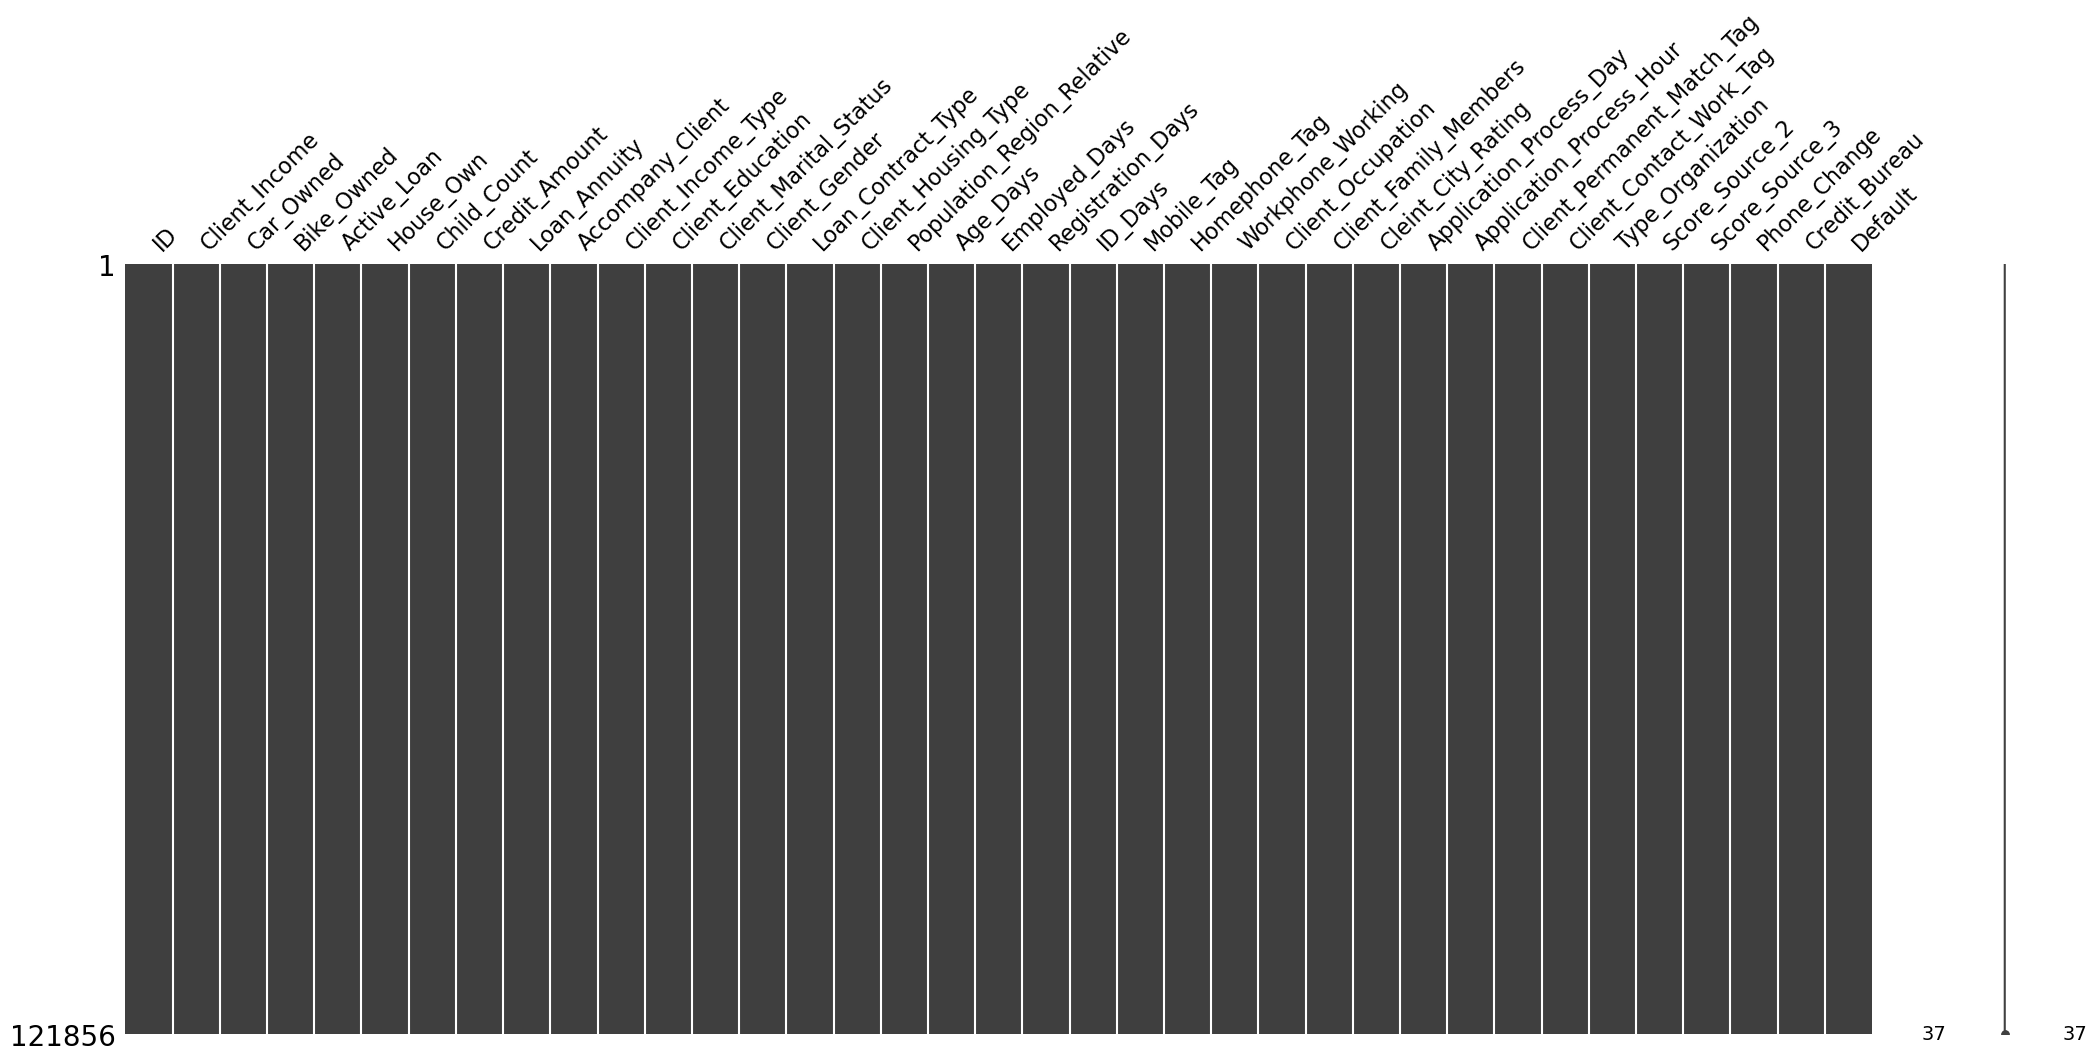

In [20]:
print(df.shape)
mn.matrix(df) 

### Outlier Treatment

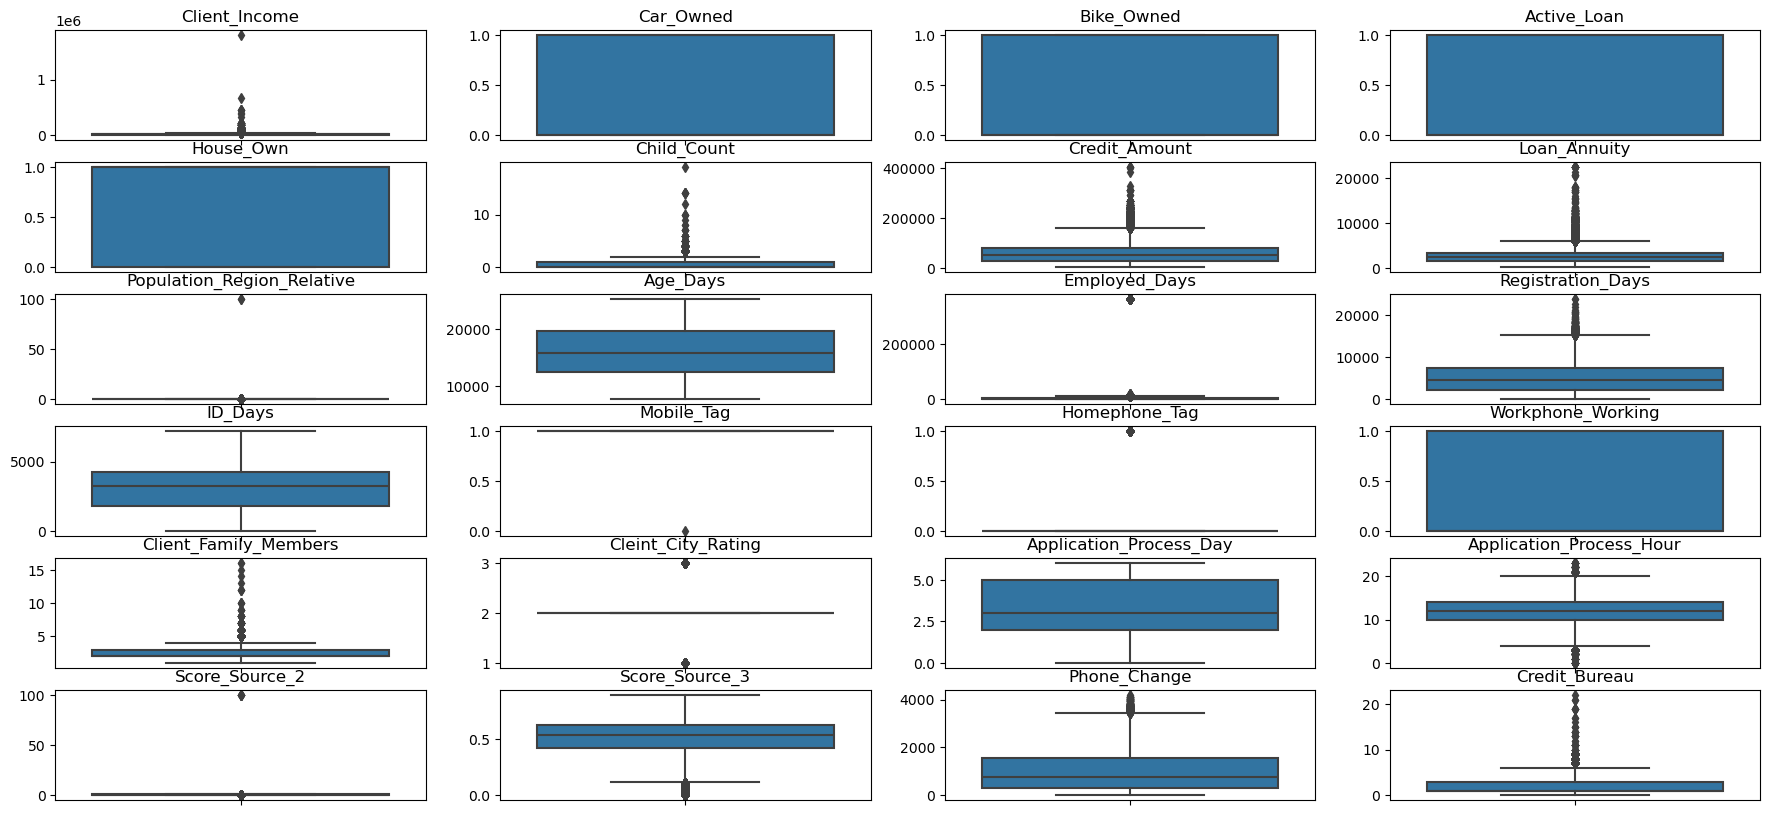

In [21]:
plt.figure(figsize=(22,10))

for i in enumerate(numeric):
    plt.subplot(6,4,i[0]+1)
    sns.boxplot(y=df[i[1]])
    plt.title(i[1])
    plt.ylabel("")

In [22]:
## Outliers are present - Capping Outliers to 99% percentile
def cap_outliers(df, column):
    """
    Caps the upper outliers at the 99th percentile and the lower outliers at the 1st percentile.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column (str): The name of the column to cap outliers for.
    
    Returns:
    pd.Series: The column with outliers capped.
    """
    # Calculate the 1st and 99th percentiles
    lower_bound = df[column].quantile(0.05)
    upper_bound = df[column].quantile(0.95)
    
    # Cap the outliers
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    
    return df[column]

# Outliers Treatment
for col in numeric:
    if df[col].max() > 1:
        # Cap outliers in the 'values' column
        df[col] = cap_outliers(df, col)

        

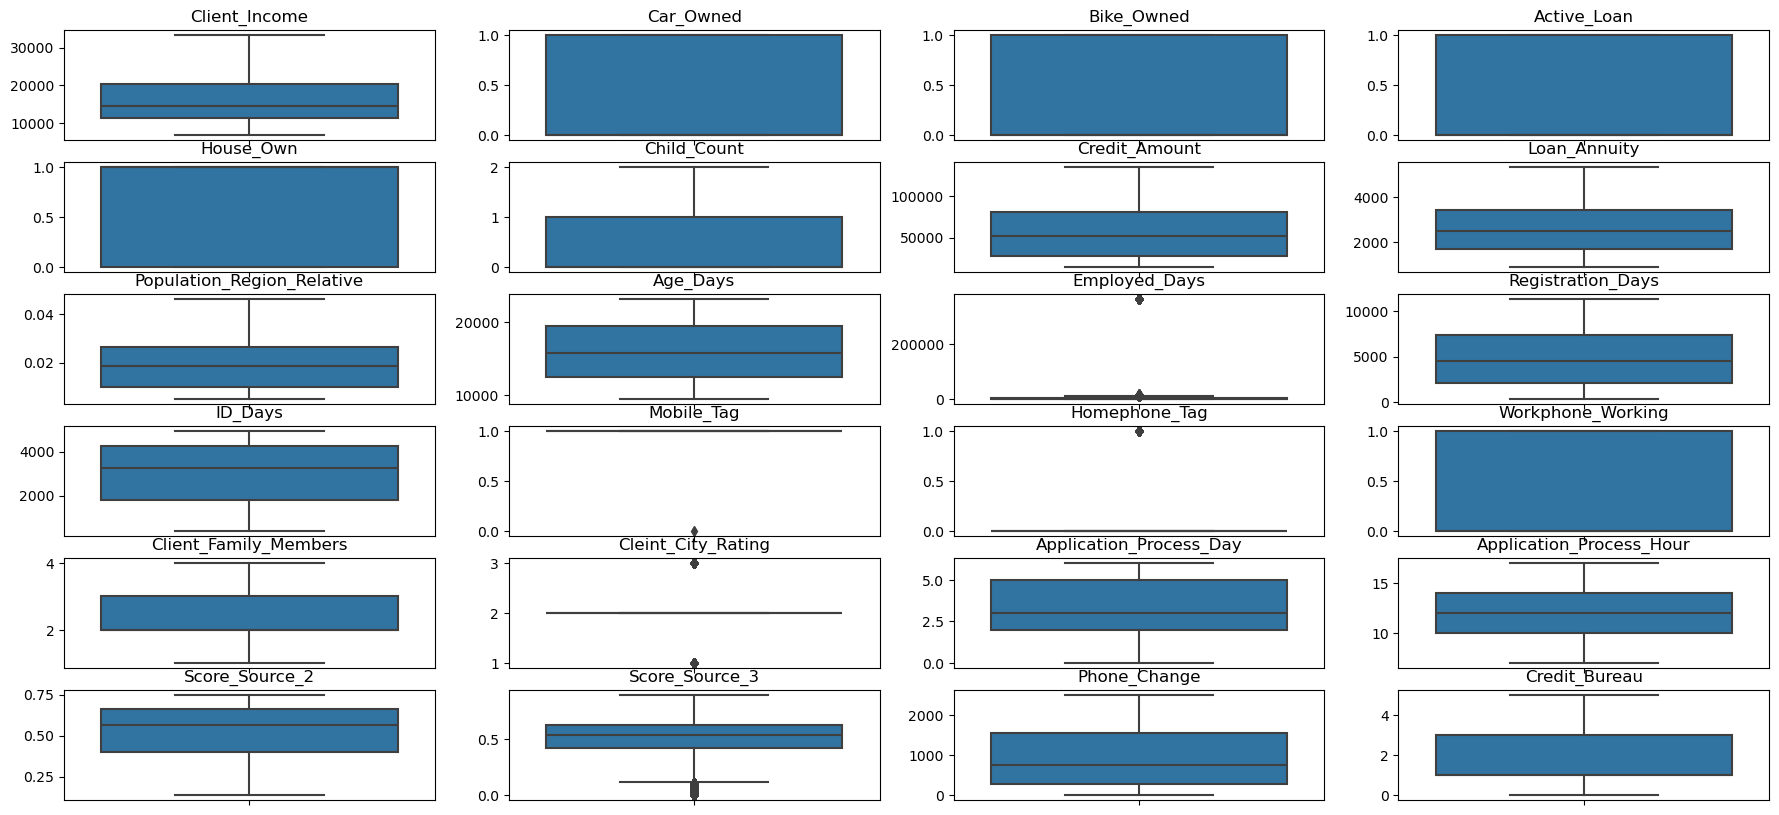

In [23]:
plt.figure(figsize=(22,10))

for i in enumerate(numeric):
    plt.subplot(6,4,i[0]+1)
    sns.boxplot(y=df[i[1]])
    plt.title(i[1])
    plt.ylabel("")

#### Univariate Analysis

In [128]:
def plot_defaulter_percentage_by_category(data, target_col, cat_col):
    """
    Plots the percentage of defaulters by category for a given categorical column.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    target_col (str): The name of the target column (e.g., 'Default').
    cat_col (str): The name of the categorical column (e.g., 'Client Gender').

    Returns:
    None
    """
    # Calculate the count of defaulters by category
    defaulter_count = data[data[target_col] == 1].groupby(cat_col)[target_col].count()

    # Calculate the total count by category
    total_count = data.groupby(cat_col)[target_col].count()

    # Calculate the percentage of defaulters by category
    defaulter_percentage = (defaulter_count / total_count)

    # Plot the results
    defaulter_percentage.plot(kind='bar', color='skyblue')
    plt.xlabel(cat_col)
    plt.ylabel(f'Percentage of {target_col.capitalize()}')
    plt.title(f'Percentage of {target_col.capitalize()} by {cat_col}')
    plt.xticks(rotation=45)
    plt.show()

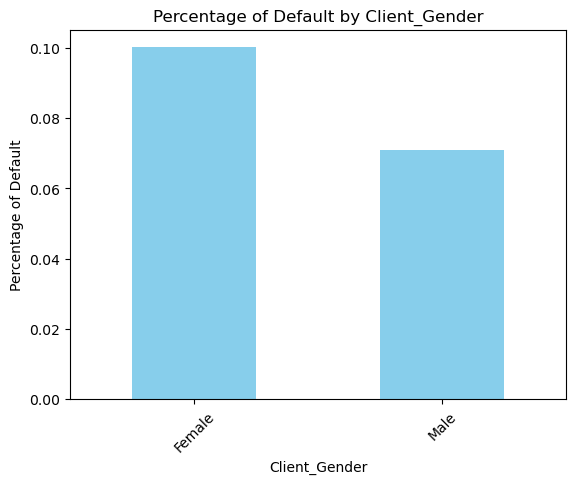

In [129]:
plot_defaulter_percentage_by_category(df,'Default','Client_Gender')
# Male has more probability of Defaulting

In [120]:
categorical

Index(['Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Client_Occupation',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization'],
      dtype='object')

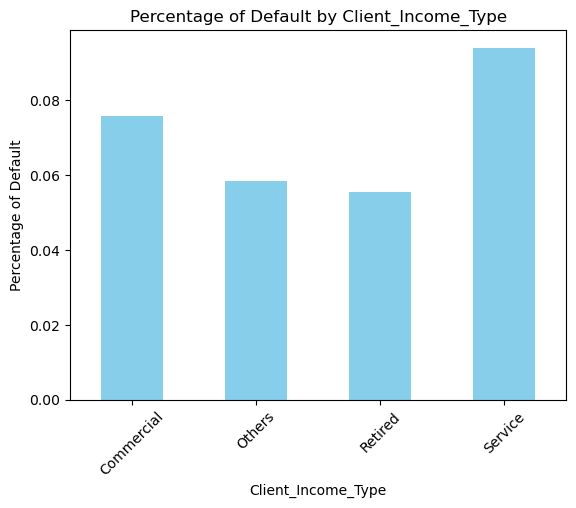

In [130]:
plot_defaulter_percentage_by_category(df,'Default','Client_Income_Type')
# Service Income CLients has more probability of Defaulting

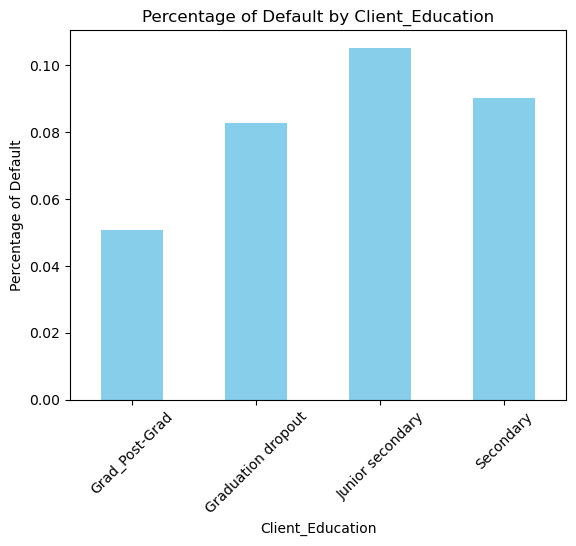

In [132]:
plot_defaulter_percentage_by_category(df,'Default','Client_Education')
# Service Income CLients has more probability of Defaulting

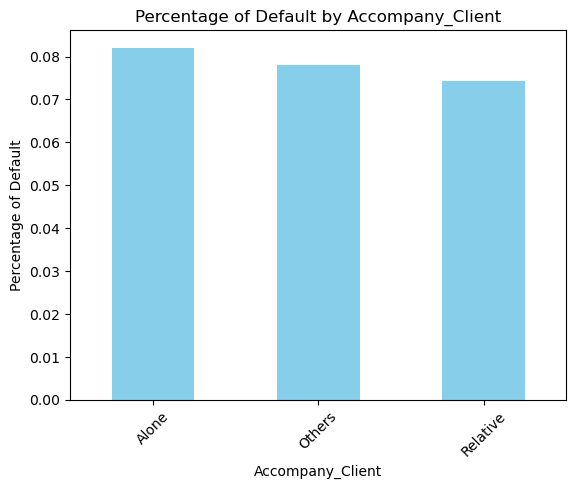

In [133]:
plot_defaulter_percentage_by_category(df,'Default','Accompany_Client')
# Service Income CLients has more probability of Defaulting

In [135]:
numeric

['Client_Income',
 'Car_Owned',
 'Bike_Owned',
 'Active_Loan',
 'House_Own',
 'Child_Count',
 'Credit_Amount',
 'Loan_Annuity',
 'Population_Region_Relative',
 'Age_Days',
 'Employed_Days',
 'Registration_Days',
 'ID_Days',
 'Mobile_Tag',
 'Homephone_Tag',
 'Workphone_Working',
 'Client_Family_Members',
 'Cleint_City_Rating',
 'Application_Process_Day',
 'Application_Process_Hour',
 'Score_Source_2',
 'Score_Source_3',
 'Phone_Change',
 'Credit_Bureau']

In [134]:
def boxplotter(data, cat, cont):

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=cat, y=cont, data=data)
    plt.xlabel(cat)
    plt.ylabel(cont)
    plt.title('Boxplot')
    plt.show()

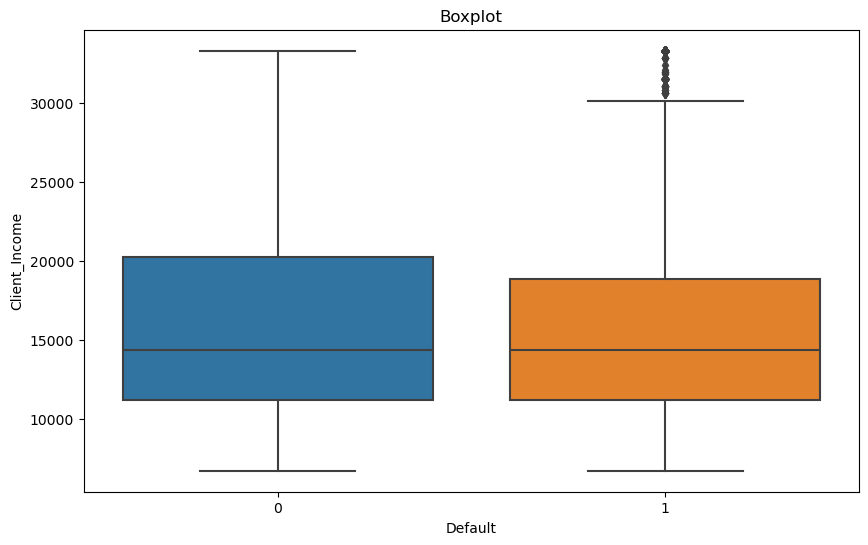

In [136]:
boxplotter(df, 'Default', 'Client_Income')

In [142]:
df['Client_Income'].describe()

count    121856.000000
mean      16236.722270
std        7100.617398
min        6750.000000
25%       11250.000000
50%       14400.000000
75%       20250.000000
max       33300.000000
Name: Client_Income, dtype: float64

(121856, 37)


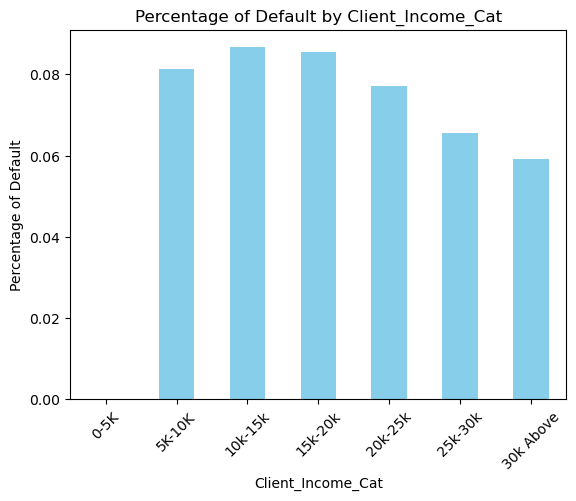

(121856, 37)


In [148]:
# Binning Numerical Columns to create a categorical column
print(df.shape)
bins = [0,5000,10000,15000,20000,25000,30000,40000]
slot = ['0-5K','5K-10K', '10k-15k','15k-20k','20k-25k','25k-30k','30k Above']

df['Client_Income_Cat']=pd.cut(df['Client_Income'], bins, labels=slot)
# print(df['Client_Income_Cat'].value_counts(normalize=True)*100)
plot_defaulter_percentage_by_category(df,'Default','Client_Income_Cat')

df = df.drop('Client_Income_Cat', axis = 1)
print(df.shape)

# Low Income have more Probability of Defaulting

### Perform One-hot encoding on all categorical variables

In [24]:
final_df = pd.get_dummies(df)

# Convert only the dummy variables to integers (0s and 1s)
# Identify the dummy columns (all columns except the original numeric ones)
dummy_columns = final_df.columns.difference(df.select_dtypes(include=['int64', 'float64']).columns)

# Convert the dummy columns to integers
final_df[dummy_columns] = final_df[dummy_columns].astype(int)
final_df.shape

(121856, 72)

### Co-relation Matrix

<Axes: >

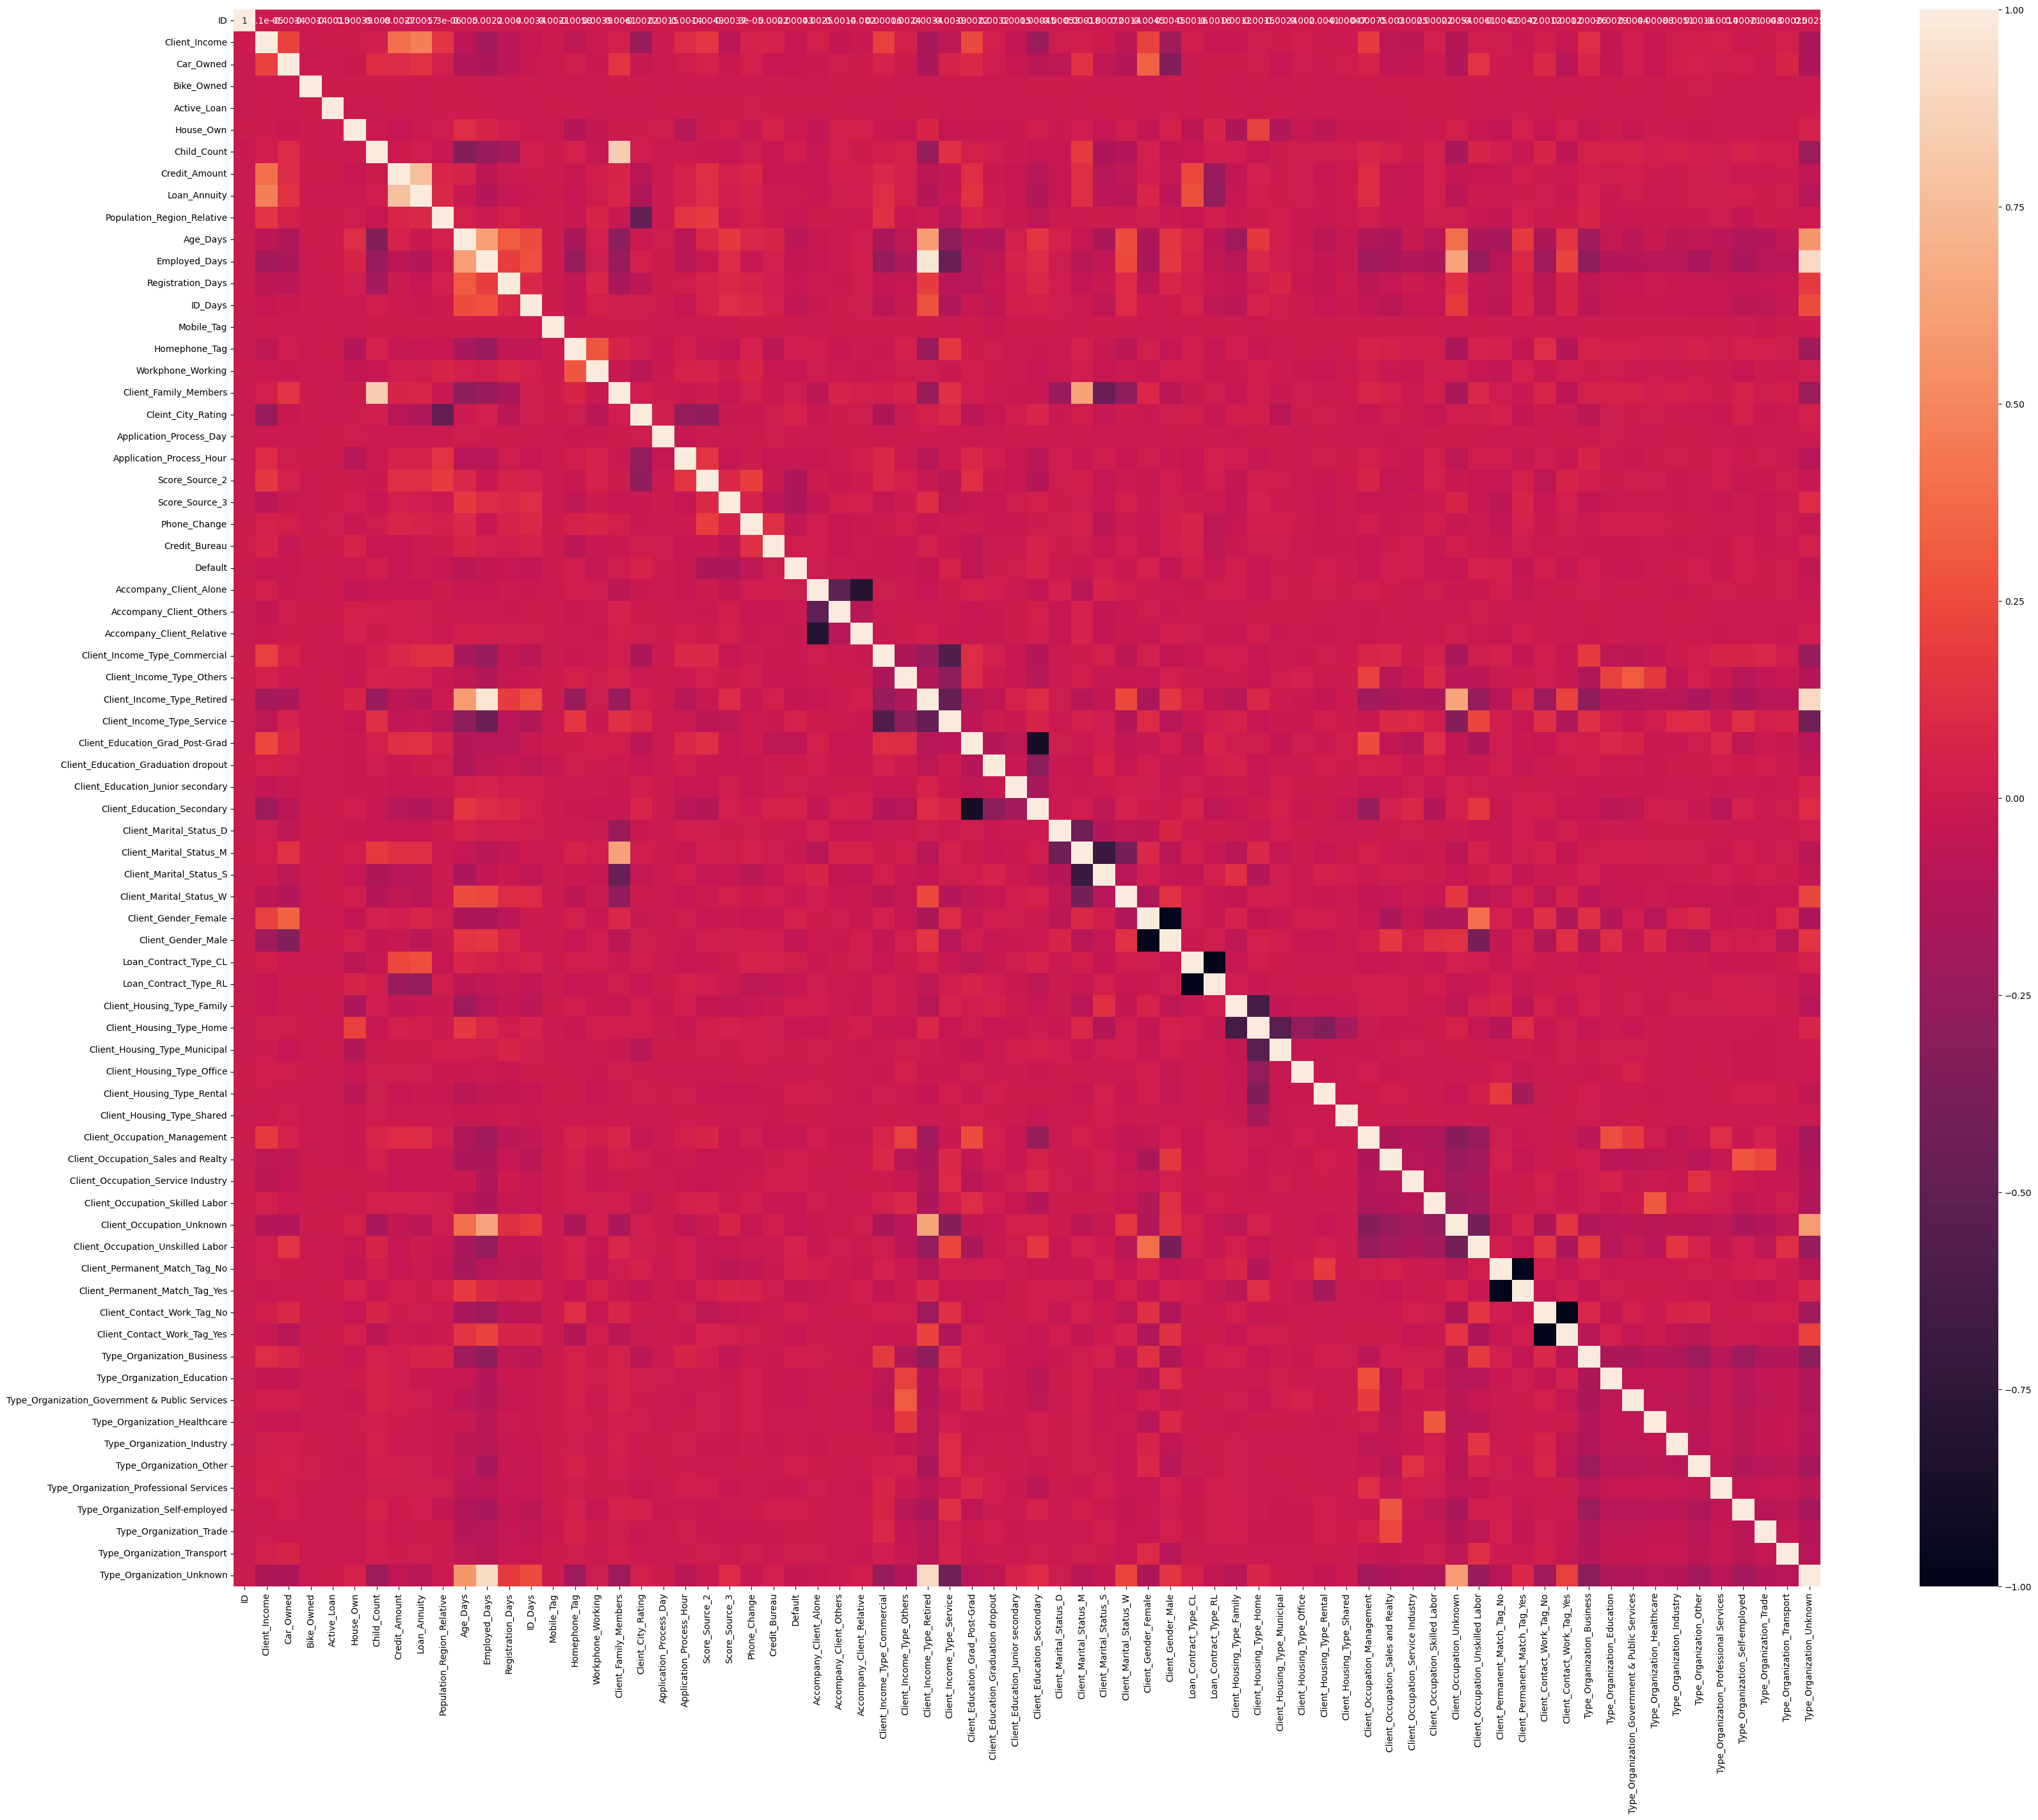

In [25]:
correlation_matrix = final_df.corr()

# Correlation Heatmap
plt.figure(figsize=(40, 32))
sns.heatmap(final_df.corr(), fmt='.2g', annot=True)


In [26]:
def remove_highly_correlated_columns(df, threshold=0.8):
    """
    Removes columns from a DataFrame that have a correlation greater than the specified threshold.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    threshold (float): The correlation threshold. Columns with correlation above this value will be removed.

    Returns:
    pd.DataFrame: The DataFrame with highly correlated columns removed.
    """
    # Calculate the correlation matrix
    corr_matrix = df.corr().abs()

    # Select upper triangle of correlation matrix
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

    # Find columns with correlation greater than the threshold
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]

    # Drop the columns
    df_reduced = df.drop(columns=to_drop)

    return df_reduced

df_reduced = remove_highly_correlated_columns(final_df, threshold=0.8)
df_reduced.shape

(121856, 63)

### Applying Machine Learning Models

#### Train Test Split

In [79]:
# Train Test Split
x = df_reduced.drop(['ID', 'Default'], axis = 1)
y = df_reduced[['Default']]

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 1)

### XGBoost : eXtreme Gradient Boost

[0 0 0 ... 0 0 0]
Test Accuracy: 91.837404601034 Training Accuracy:  93.5368527180858
[[33435   128]
 [ 2856   138]]


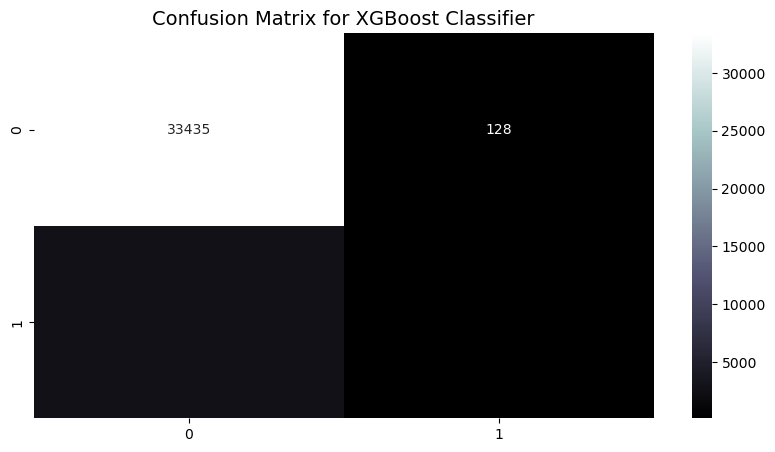

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     33563
           1       0.52      0.05      0.08      2994

    accuracy                           0.92     36557
   macro avg       0.72      0.52      0.52     36557
weighted avg       0.89      0.92      0.89     36557



In [80]:
import xgboost as xgb
xgb = xgb.XGBClassifier()

xgb.fit(xtrain, ytrain)

xgb_pred = xgb.predict(xtest)
print(xgb_pred)

# Accuracy Score or Test Accuracy
print('Test Accuracy:', accuracy_score(ytest, xgb_pred)*100, 'Training Accuracy: ', xgb.score(xtrain, ytrain)*100)

cf_xgb = confusion_matrix(ytest, xgb_pred)
print(cf_xgb)

plt.figure(figsize=(10,5))
plt.title('Confusion Matrix for XGBoost Classifier', fontsize = 14)
sns.heatmap(cf_xgb, annot = True, fmt = 'g', cmap ='bone')
plt.show()

print(classification_report(ytest, xgb_pred))

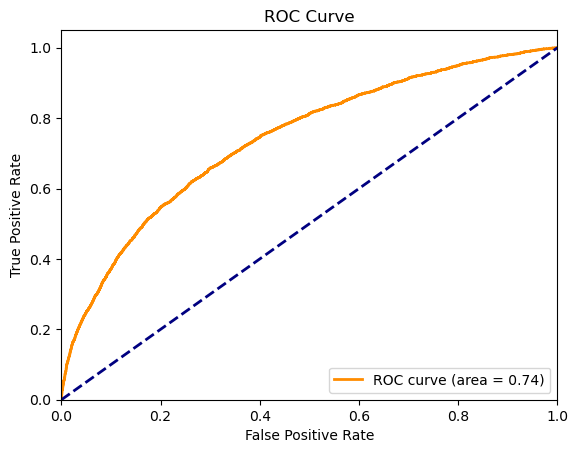

In [81]:
y_pred_proba = xgb.predict_proba(xtest)[:, 1]
fpr, tpr, _ = roc_curve(ytest, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


### Resampling

In [82]:
# Count the number of samples in each class
class_counts = df_reduced['Default'].value_counts()

# Calculate the class imbalance ratio
imbalance_ratio = class_counts[1] / class_counts[0]

# Print the class counts and imbalance ratio
print("Class Counts:")
print(class_counts)
print("\nImbalance Ratio (1's to 0's):", imbalance_ratio)


Class Counts:
Default
0    112011
1      9845
Name: count, dtype: int64

Imbalance Ratio (1's to 0's): 0.08789315335101017


In [83]:
from imblearn.over_sampling import SMOTE
# Create the SMOTE object
smote = SMOTE(random_state=0)

# Apply SMOTE to the training data
xtrain_resampled, ytrain_resampled = smote.fit_resample(xtrain, ytrain)

# Check the class distribution after resampling
class_counts_resampled = ytrain_resampled.value_counts()
imbalance_ratio_resampled = class_counts_resampled[1] / class_counts_resampled[0]

print("Class Counts After SMOTE:")
print(class_counts_resampled)
print("\nImbalance Ratio After SMOTE:", imbalance_ratio_resampled)


Class Counts After SMOTE:
Default
0          78448
1          78448
Name: count, dtype: int64

Imbalance Ratio After SMOTE: 1.0


[0 0 0 ... 0 0 0]
Test Accuracy: 91.7662827912575 Training Accuracy:  93.5333356780267
[[33391   172]
 [ 2838   156]]


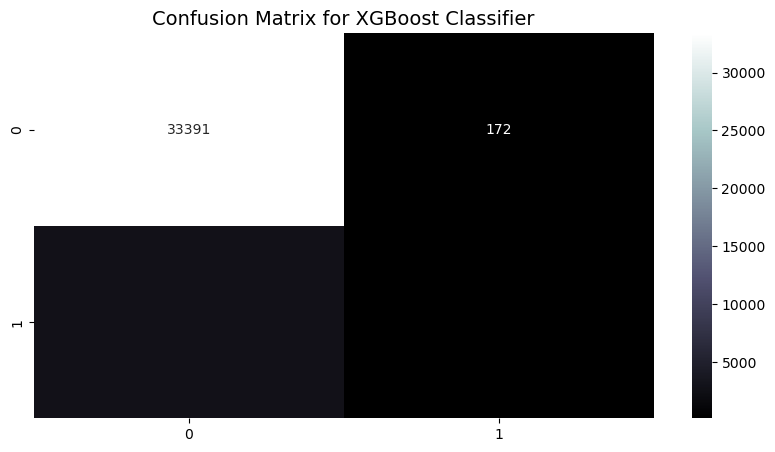

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     33563
           1       0.48      0.05      0.09      2994

    accuracy                           0.92     36557
   macro avg       0.70      0.52      0.53     36557
weighted avg       0.89      0.92      0.89     36557



In [179]:
import xgboost as xgb
xgboost = xgb.XGBClassifier()

xgboost.fit(xtrain_resampled, ytrain_resampled)

xgb_pred = xgboost.predict(xtest)
print(xgb_pred)

# Accuracy Score or Test Accuracy
print('Test Accuracy:', accuracy_score(ytest, xgb_pred)*100, 'Training Accuracy: ', xgboost.score(xtrain, ytrain)*100)

cf_xgb = confusion_matrix(ytest, xgb_pred)
print(cf_xgb)

plt.figure(figsize=(10,5))
plt.title('Confusion Matrix for XGBoost Classifier', fontsize = 14)
sns.heatmap(cf_xgb, annot = True, fmt = 'g', cmap ='bone')
plt.show()

print(classification_report(ytest, xgb_pred))

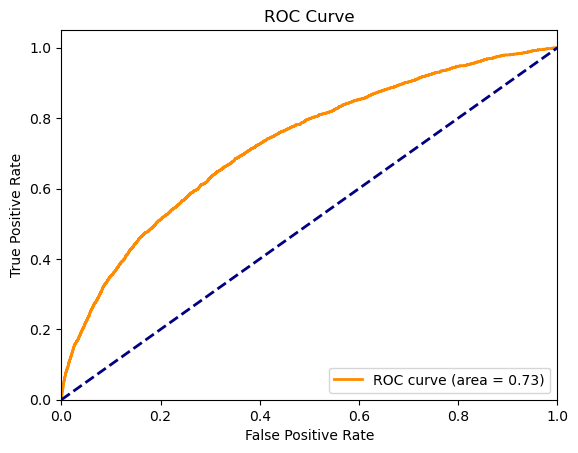

In [180]:
y_pred_proba = xgboost.predict_proba(xtest)[:, 1]
fpr, tpr, _ = roc_curve(ytest, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


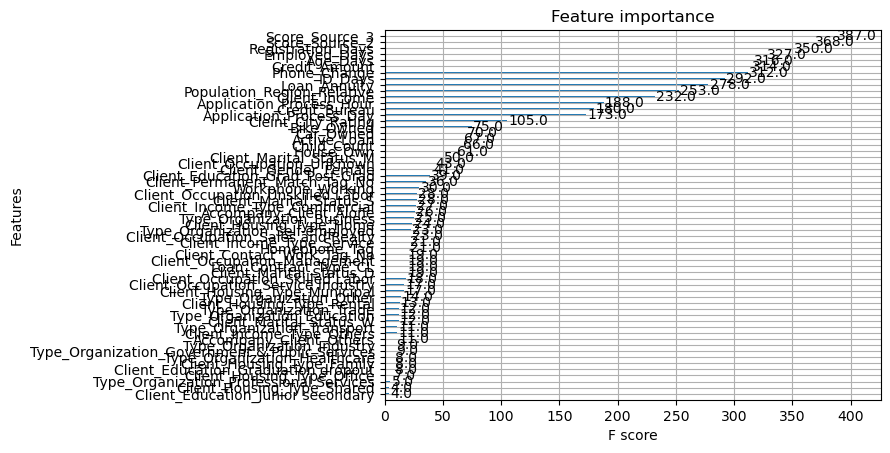

In [185]:
from sklearn.feature_selection import SelectFromModel
# plot feature importance
xgb.plot_importance(xgboost)

thresholds = sorted(xgboost.feature_importances_)
# for thresh in thresholds:
#     # select features using threshold
#     selection = SelectFromModel(xgboost, threshold=thresh, prefit=True)
#     select_X_train = selection.transform(xtrain_resampled)
#     # train model
#     selection_model = XGBClassifier()
#     selection_model.fit(select_X_train, ytrain_resampled)
#     # eval model
#     select_X_test = selection.transform(xtest)
#     y_pred = selection_model.predict(select_X_test)
#     predictions = [round(value) for value in y_pred]
#     accuracy = accuracy_score(ytest, predictions)
#     print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))


### Hyper Parameter Tuning

In [196]:
param_test = {
    'reg_alpha':[1e-5, 1e-2, 0.1, 100],
    'max_depth':[12,15,20],
    'n_estimators':[10, 15, 20]
}
gsearch = GridSearchCV(estimator = 
XGBClassifier(learning_rate =0.1,
              min_child_weight=2,
              gamma=0.1,
              subsample=0.85,
              colsample_bytree=0.8,
              objective= 'binary:logistic',
              nthread=4,
              scale_pos_weight=1,
              seed=27), 
              param_grid = param_test,
              scoring='roc_auc',
              n_jobs=4,
              cv=2,
              verbose=10)

gsearch.fit(xtrain_resampled, ytrain_resampled)

print('Best Grid Search Parameters :',gsearch.best_params_)
print('Best Grid Search Score : ',gsearch.best_score_)

Fitting 2 folds for each of 36 candidates, totalling 72 fits
Best Grid Search Parameters : {'max_depth': 20, 'n_estimators': 20, 'reg_alpha': 0.01}
Best Grid Search Score :  0.9763412794317761


[0 0 0 ... 0 0 0]
Test Accuracy: 91.96597094947616 Training Accuracy:  95.44074373673783
[[33510    53]
 [ 2884   110]]


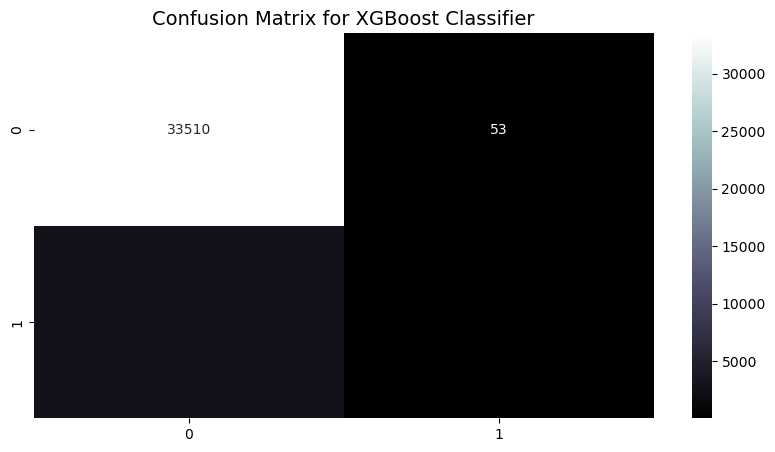

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     33563
           1       0.67      0.04      0.07      2994

    accuracy                           0.92     36557
   macro avg       0.80      0.52      0.51     36557
weighted avg       0.90      0.92      0.89     36557



In [198]:
import xgboost as xgb
xgboost = xgb.XGBClassifier(learning_rate =0.1,
                            min_child_weight=2,
                            max_depth=20,
                            n_estimators=20,
                            reg_alpha=0.01,
                            gamma=0.1,
                            subsample=0.85,
                            colsample_bytree=0.8,
                            objective= 'binary:logistic',
                            nthread=4,
                            scale_pos_weight=1,
                            seed=27)

xgboost.fit(xtrain_resampled, ytrain_resampled)

xgb_pred = xgboost.predict(xtest)
print(xgb_pred)

# Accuracy Score or Test Accuracy
print('Test Accuracy:', accuracy_score(ytest, xgb_pred)*100, 'Training Accuracy: ', xgboost.score(xtrain, ytrain)*100)

cf_xgb = confusion_matrix(ytest, xgb_pred)
print(cf_xgb)

plt.figure(figsize=(10,5))
plt.title('Confusion Matrix for XGBoost Classifier', fontsize = 14)
sns.heatmap(cf_xgb, annot = True, fmt = 'g', cmap ='bone')
plt.show()

print(classification_report(ytest, xgb_pred))